In [1]:
#Q1 without sklearn
import numpy as np
import pandas as pd


df = pd.read_csv("./mnist.csv",header=None)
X = df.drop([0], axis=1)
Y = df.loc[:,0]

#1. subtract mean
X_standard = X - X.mean()

#2. calculate the covariance matrix
df_cov = X_standard.cov()
display(df_cov)

#3. calculate eigenvectors and eigenvalues of convariance matrix
from numpy.linalg import eig
eigvalues, eigvectors = eig(df_cov)

#4. Rank eigenvectors by its corresponding eigenvalues
idx = np.argsort(eigvalues, axis=0)[::-1]
eigvectors = eigvectors[:, idx]

#5. Compute the transformation
X_pca = np.dot(X_standard, eigvectors)
df_pca = pd.DataFrame(X_pca)
df_pca = df_pca.loc[:,:10]
display(df_pca)
display(df_pca.cov())

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,10
0,0.532405+0.000000j,-1.373728+0.000000j,0.136335+0.000000j,1.973713+0.000000j,0.610730+0.000000j,-1.162673+0.000000j,0.718612+0.000000j,0.187210+0.000000j,-1.324856+0.000000j,-0.735765+0.000000j,-0.062358+0.000000j
1,4.249130+0.000000j,-1.259868+0.000000j,1.993618+0.000000j,1.566241+0.000000j,-2.922031+0.000000j,-1.128452+0.000000j,-0.231270+0.000000j,-0.598067+0.000000j,0.533330+0.000000j,-0.246572+0.000000j,-1.485386+0.000000j
2,-0.284625+0.000000j,1.745702+0.000000j,-1.154583+0.000000j,-1.505045+0.000000j,-1.143595+0.000000j,0.384026+0.000000j,-3.640476+0.000000j,0.921375+0.000000j,-0.764757+0.000000j,0.622131+0.000000j,1.404316+0.000000j
3,-3.434119+0.000000j,-2.445619+0.000000j,0.644641+0.000000j,-0.446748+0.000000j,-1.118803+0.000000j,2.701375+0.000000j,-1.005772+0.000000j,-0.141751+0.000000j,1.449167+0.000000j,0.409133+0.000000j,-1.641747+0.000000j
4,-1.495360+0.000000j,2.667722+0.000000j,0.040200+0.000000j,1.020414+0.000000j,0.517129+0.000000j,0.148956+0.000000j,-0.278758+0.000000j,-1.471936+0.000000j,1.203028+0.000000j,-0.514768+0.000000j,-1.133680+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...
5995,1.867292+0.000000j,3.858885+0.000000j,0.147382+0.000000j,3.667121+0.000000j,0.079476+0.000000j,-0.352295+0.000000j,2.023842+0.000000j,2.800749+0.000000j,0.871639+0.000000j,-0.278743+0.000000j,0.600498+0.000000j
5996,-0.231574+0.000000j,0.635002+0.000000j,-0.284166+0.000000j,-2.917997+0.000000j,0.987918+0.000000j,-2.061104+0.000000j,-0.486799+0.000000j,-1.088128+0.000000j,-0.695389+0.000000j,1.420711+0.000000j,-0.142320+0.000000j
5997,0.039251+0.000000j,-2.652329+0.000000j,2.936584+0.000000j,2.800967+0.000000j,2.675649+0.000000j,0.390867+0.000000j,0.480649+0.000000j,-1.820223+0.000000j,1.562611+0.000000j,-2.596365+0.000000j,-0.028841+0.000000j
5998,1.149299+0.000000j,-0.204864+0.000000j,1.305028+0.000000j,-1.884489+0.000000j,-0.458144+0.000000j,-3.404241+0.000000j,0.298393+0.000000j,1.292199+0.000000j,0.330325+0.000000j,1.070618+0.000000j,-0.562167+0.000000j


/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/internals/managers.py:870: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = arr.astype(dtype, copy=False)


,0,1,2,3,4,5,6,7,8,9,10
0,5.305587e+00,2.785792e-15,5.618961e-15,-8.571610e-16,-6.467017e-16,6.857880e-16,1.054147e-16,2.629446e-16,8.320658e-16,-1.385789e-16,-1.116330e-16
1,2.785792e-15,3.877016e+00,2.686299e-15,-9.807124e-16,1.356178e-16,1.329825e-15,9.940373e-16,8.042316e-16,2.604573e-15,3.079532e-17,-2.368871e-17
2,5.618961e-15,2.686299e-15,3.287047e+00,-2.699328e-15,2.629446e-16,3.776276e-15,-3.517773e-16,-1.160747e-16,1.527922e-16,1.254317e-15,9.890035e-16
3,-8.571610e-16,-9.807124e-16,-2.699328e-15,2.912541e+00,4.530465e-16,-9.075735e-16,-1.009139e-15,2.222001e-15,2.231772e-15,-8.698197e-18,3.565150e-16
4,-6.467017e-16,1.356178e-16,2.629446e-16,4.530465e-16,2.486332e+00,1.555164e-15,2.096450e-15,1.673015e-16,8.480557e-16,6.188674e-16,-1.148902e-16
5,6.857880e-16,1.329825e-15,3.776276e-15,-9.075735e-16,1.555164e-15,2.353589e+00,-9.807124e-16,3.201677e-16,4.483088e-16,-4.050769e-16,1.664132e-16
6,1.054147e-16,9.940373e-16,-3.517773e-16,-1.009139e-15,2.096450e-15,-9.807124e-16,1.755568e+00,-1.935071e-15,-4.812361e-15,-4.678519e-16,-4.477165e-16
7,2.629446e-16,8.042316e-16,-1.160747e-16,2.222001e-15,1.673015e-16,3.201677e-16,-1.935071e-15,1.544760e+00,1.261424e-15,9.157165e-17,-8.468712e-17
8,8.320658e-16,2.604573e-15,1.527922e-16,2.231772e-15,8.480557e-16,4.483088e-16,-4.812361e-15,1.261424e-15,1.454745e+00,1.003217e-15,1.324643e-15
9,-1.385789e-16,3.079532e-17,1.254317e-15,-8.698197e-18,6.188674e-16,-4.050769e-16,-4.678519e-16,9.157165e-17,1.003217e-15,1.243380e+00,1.554571e-15


(6000, 784)
(6000, 784)
(784, 784)
[0.1  0.07 0.06 0.06 0.05 0.04 0.03 0.03 0.03 0.02]


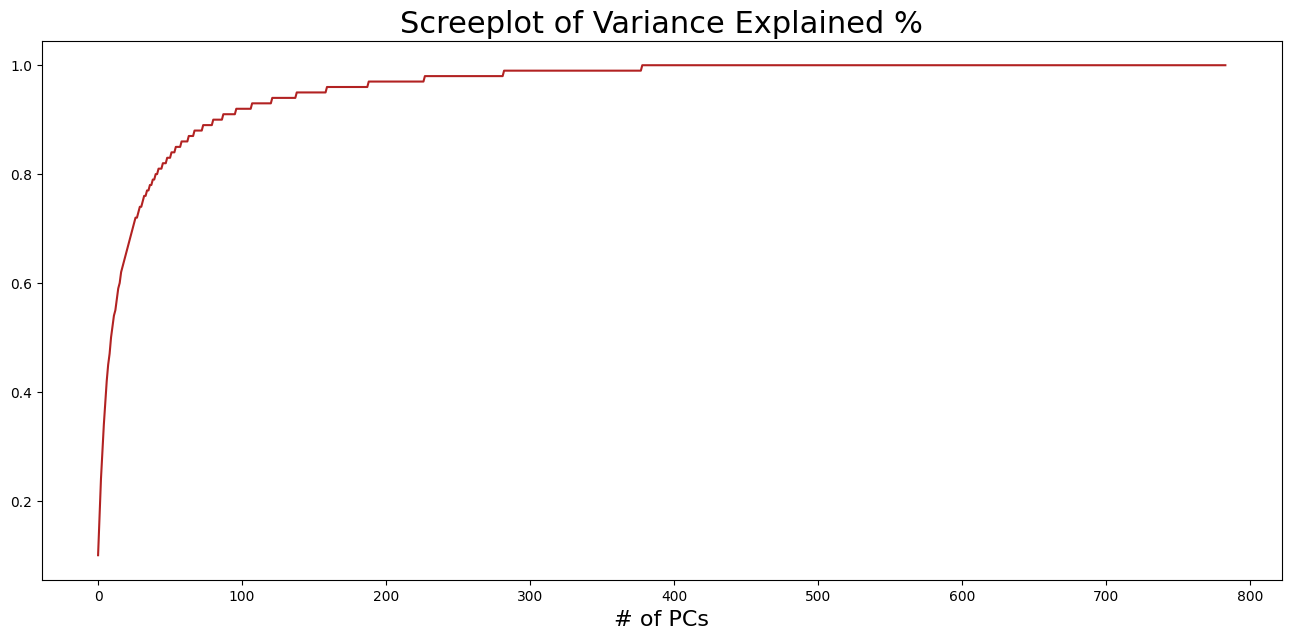

In [2]:
# PCA with sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# import and prepare data
df = pd.read_csv("./mnist.csv",header=None)

df.head()

X = df.drop([0], axis=1)
Y = df.loc[:,0]
print(X.shape)
X.head()
Y.head()

pca =PCA()
df_pca = pca.fit_transform(X=X)

df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.round(2).head()

# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
print(df_pca_loadings.shape)
df_pca_loadings.head()

X_mean = X - X.mean()
X_mean.head()
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[0, :])

print(pca.explained_variance_ratio_.round(2)[:10])
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [3]:
# Question 2
import numpy as np
import pandas as pd
import random

dataSet = pd.read_csv('mnist.csv', header=None).to_numpy()
dataSet = dataSet[:, 1:]

k = 10

rand_index = random.sample(range(0, len(dataSet)), k)
# randomly pick ten points from the dataset as the initial centroids
centroidsSet = []
for i in rand_index:
    centroidsSet.append(dataSet[i])
centroidsSet = np.asarray(centroidsSet)

#count for iteration
count = 0

while(True):
    count = count + 1
    print("iterate " + str(count) + " times")
    
    cluster = []

    for i in range(len(dataSet)):
        distance = []

        for j in range(k):
            # calculate the distance between point to each centroids by norm 2
            distance.append(np.linalg.norm(dataSet[i] - centroidsSet[j]))
            
        #pick the cloest distance
        cluster.append(np.argmin(distance))

    cluster = np.asarray(cluster)

    clustered_dataset = [[] for i in range(k)]

    for i in range(len(dataSet)):
        # divide datapoint into cluster
        clustered_dataset[cluster[i]].append(dataSet[i])

    clustered_dataset = np.asarray(clustered_dataset)

    new_centroids = []
    for i in clustered_dataset:
        # update new centroids by every cluster's average
        new_centroids.append(np.mean(i, axis = 0))
        
    new_centroids = np.asarray(new_centroids)
    
    if np.array_equal(new_centroids, centroidsSet):
        # classify complete after centroids does not moved any more
        print("Converged in", count, "times")
        print("Cluster number:")
        print(cluster)
        break
    else:
        # else, update the centroids, continue loop
        centroidsSet = new_centroids

iterate 1 times
/tmp/ipykernel_81/479542013.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustered_dataset = np.asarray(clustered_dataset)
iterate 2 times
iterate 3 times
iterate 4 times
iterate 5 times
iterate 6 times
iterate 7 times
iterate 8 times
iterate 9 times
iterate 10 times
iterate 11 times
iterate 12 times
iterate 13 times
iterate 14 times
iterate 15 times
iterate 16 times
iterate 17 times
iterate 18 times
iterate 19 times
iterate 20 times
iterate 21 times
iterate 22 times
iterate 23 times
iterate 24 times
iterate 25 times
iterate 26 times
iterate 27 times
iterate 28 times
iterate 29 times
iterate 30 times
iterate 31 times
iterate 32 times
iterate 33 times
iterate 34 times
iterate 35 times
iterate 36 times
iterate 37 times
iterate 38 times
iterate 39

iterate 1 times
/tmp/ipykernel_81/2512550134.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustered_dataset = np.asarray(clustered_dataset)
iterate 2 times
iterate 3 times
iterate 4 times
iterate 5 times
iterate 6 times
iterate 7 times
iterate 8 times
iterate 9 times
iterate 10 times
iterate 11 times
iterate 12 times
iterate 13 times
iterate 14 times
iterate 15 times
iterate 16 times
iterate 17 times
iterate 18 times
iterate 19 times
iterate 20 times
iterate 21 times
iterate 22 times
iterate 23 times
iterate 24 times
iterate 25 times
iterate 26 times
iterate 27 times
iterate 28 times
iterate 29 times
iterate 30 times
iterate 31 times
iterate 32 times
iterate 33 times
iterate 34 times
iterate 35 times
iterate 36 times
iterate 37 times
iterate 38 times
iterate 3

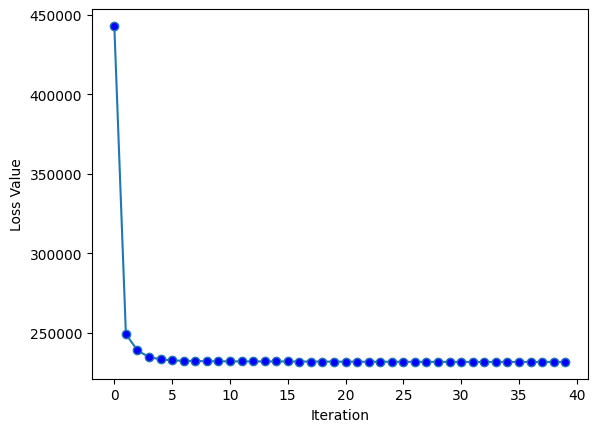

In [4]:
#Question 3
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

dataSet = pd.read_csv('mnist.csv', header=None).to_numpy()
dataSet = dataSet[:, 1:]

k = 10

rand_index = random.sample(range(0, len(dataSet)), k)
# randomly pick ten points from the dataset as the initial centroids
centroidsSet = []
for i in rand_index:
    centroidsSet.append(dataSet[i])
centroidsSet = np.asarray(centroidsSet)

lossValueSet = []

#count for iteration
count = 0

while(True):
    count = count + 1
    print("iterate " + str(count) + " times")
    lossValue = 0
    cluster = []

    for i in range(len(dataSet)):
        distance = []

        for j in range(k):
            # calculate the distance between point to each centroids by norm 2
            distance.append(np.linalg.norm(dataSet[i] - centroidsSet[j]))
            
        #pick the cloest distance
        cluster.append(np.argmin(distance))

        # calculate loss value
        lossValue = lossValue + np.linalg.norm(dataSet[i] - centroidsSet[np.argmin(distance)]) ** 2

    cluster = np.asarray(cluster)
    lossValueSet.append(lossValue)

    clustered_dataset = [[] for i in range(k)]

    for i in range(len(dataSet)):
        # divide datapoint into cluster
        clustered_dataset[cluster[i]].append(dataSet[i])

    clustered_dataset = np.asarray(clustered_dataset)

    new_centroids = []
    for i in clustered_dataset:
        # update new centroids by every cluster's average
        new_centroids.append(np.mean(i, axis = 0))
        
    new_centroids = np.asarray(new_centroids)
    
    if np.array_equal(new_centroids, centroidsSet):
        # classify complete after centroids does not moved any more
        print("Converged in", count, "times")
        print("Cluster number:")
        print(cluster)

        #loss value and plot
        print("Loss value for each iteration:", lossValueSet)
        plt.plot(lossValueSet, marker = 'o', markerfacecolor = 'blue')
        plt.xlabel("Iteration")
        plt.ylabel("Loss Value")
        plt.show()
        break
    else:
        # else, update the centroids, continue loop
        centroidsSet = new_centroids

/tmp/ipykernel_81/2652230803.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainingSet_split = np.asarray(trainingSet_split)
The best k is: 7
Loss value for training set: [194947.4456164535, 184921.56068664396, 177734.25708479385, 170514.67839043614, 169961.5110663451, 161938.12348627264, 159924.02140076543, 157693.5340087616, 153082.3583935137, 153100.37330557793, 148920.20734555225, 146841.05966419674, 147264.7534229366, 143007.85809098335, 142220.08059714502, 140256.09435280765, 140259.8137429089, 136837.54046122546, 137387.44299145043]


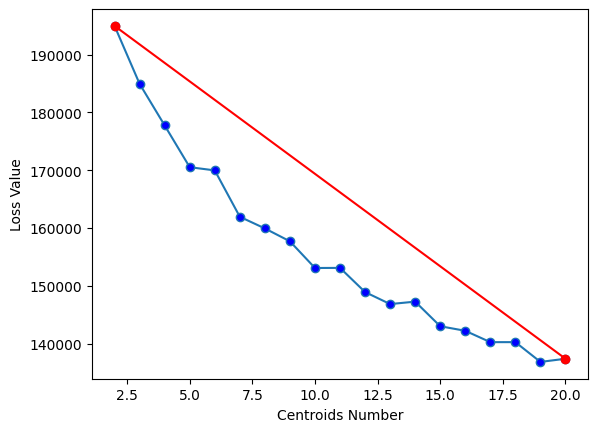

In [5]:
#Question 4
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def best_k(lossValueSet,centroid_num_list):
    # get best k when changing ratio is maximum

    a = loss_valueSet[0] - loss_valueSet[-1]
    b = centroid_num_list[-1] - centroid_num_list[0]
    c = loss_valueSet[-1] * centroid_num_list[0] - loss_valueSet[0] * centroid_num_list[-1]

    ratio = []
    for i in range(len(centroid_num_list)):
        x = centroid_num_list[i]
        y = loss_valueSet[i]
        ratio.append(abs((a * x + b * y + c) / b))

    max_ratio = ratio.index(max(ratio))    
    return centroid_num_list[max_ratio]



dataSet = pd.read_csv('mnist.csv', header=None).to_numpy()
dataSet = dataSet[:, 1:]

# set the dataset
trainingSet = dataSet[0:3999]
testingSet = dataSet[4000:5999]

centroid_num = 1
centroid_num_list = []
loss_valueSet = []
centroid_k = []

for k in range(1,20,1):
    centroid_num = centroid_num + 1
    centroid_num_list.append(centroid_num)

    random_index = random.sample(range(0,len(trainingSet)), centroid_num)

    #store the random centroids
    centroidsSet = []

    for i in random_index:
        centroidsSet.append(trainingSet[i])
    centroidsSet = np.asarray(centroidsSet)

    #count for iteration
    count = 0

    while(True):
        count +=1
        lossValue = 0
        cluster = []

        for i in range(len(trainingSet)):
            distance = []

            for j in range(centroid_num):
                # calculate the distance between point to each centroids by norm 2
                distance.append(np.linalg.norm(trainingSet[i] - centroidsSet[j]))
            
            #pick the cloest distance
            cluster.append(np.argmin(distance))

            # calculate loss value
            lossValue = lossValue + np.linalg.norm(trainingSet[i] - centroidsSet[np.argmin(distance)]) ** 2
        cluster = np.asarray(cluster)

        trainingSet_split = [[] for i in range(centroid_num)]

        for i in range(len(trainingSet)):
            trainingSet_split[cluster[i]].append(trainingSet[i])
        trainingSet_split = np.asarray(trainingSet_split)
        
        new_centroids = []
        for i in trainingSet_split:
        # update new centroids by every cluster's average
            new_centroids.append(np.mean(i, axis = 0))
        
        new_centroids = np.asarray(new_centroids)
    
        if np.array_equal(new_centroids, centroidsSet):
            loss_valueSet.append(lossValue)
            centroid_k.append(centroidsSet)
            break
        else:
        # else, update the centroids, continue loop
            centroidsSet = new_centroids

best_k = best_k(loss_valueSet, centroid_num_list)
print("The best k is:", best_k)
print("Loss value for training set:", loss_valueSet)
plt.xlabel("Centroids Number")
plt.ylabel("Loss Value")
plt.plot(centroid_num_list, loss_valueSet, marker = 'o', markerfacecolor = 'blue')
plt.plot([centroid_num_list[0], centroid_num_list[-1]], [loss_valueSet[0], loss_valueSet[-1]], '-ro')
plt.show()

# My lap top is too slow, have to use cloud service instead


        

iterate 1 times
/tmp/ipykernel_81/1124440483.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustered_dataset = np.asarray(clustered_dataset)
iterate 2 times
iterate 3 times
iterate 4 times
iterate 5 times
iterate 6 times
iterate 7 times
iterate 8 times
iterate 9 times
iterate 10 times
iterate 11 times
iterate 12 times
iterate 13 times
iterate 14 times
iterate 15 times
iterate 16 times
iterate 17 times
iterate 18 times
iterate 19 times
iterate 20 times
iterate 21 times
iterate 22 times
iterate 23 times
iterate 24 times
iterate 25 times
iterate 26 times
iterate 27 times
iterate 28 times
iterate 29 times
iterate 30 times
iterate 31 times
iterate 32 times
iterate 33 times
iterate 34 times
iterate 35 times
iterate 36 times
iterate 37 times
Converged in 37 times
Clus

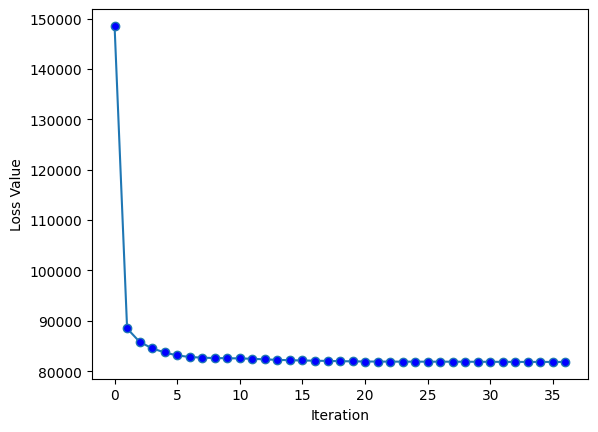

In [7]:
#Q4 validation
#As decided by trainning data
k = 8

rand_index = random.sample(range(0, len(testingSet)), k)
# randomly pick ten points from the dataset as the initial centroids
centroidsSet = []
for i in rand_index:
    centroidsSet.append(testingSet[i])
centroidsSet = np.asarray(centroidsSet)

lossValueSet = []

#count for iteration
count = 0

while(True):
    count = count + 1
    print("iterate " + str(count) + " times")
    lossValue = 0
    cluster = []

    for i in range(len(testingSet)):
        distance = []

        for j in range(k):
            # calculate the distance between point to each centroids by norm 2
            distance.append(np.linalg.norm(testingSet[i] - centroidsSet[j]))
            
        #pick the cloest distance
        cluster.append(np.argmin(distance))

        # calculate loss value
        lossValue = lossValue + np.linalg.norm(testingSet[i] - centroidsSet[np.argmin(distance)]) ** 2

    cluster = np.asarray(cluster)
    lossValueSet.append(lossValue)

    clustered_dataset = [[] for i in range(k)]

    for i in range(len(testingSet)):
        # divide datapoint into cluster
        clustered_dataset[cluster[i]].append(testingSet[i])

    clustered_dataset = np.asarray(clustered_dataset)

    new_centroids = []
    for i in clustered_dataset:
        # update new centroids by every cluster's average
        new_centroids.append(np.mean(i, axis = 0))
        
    new_centroids = np.asarray(new_centroids)
    
    if np.array_equal(new_centroids, centroidsSet):
        # classify complete after centroids does not moved any more
        print("Converged in", count, "times")
        print("Cluster number:")
        print(cluster)

        #loss value and plot
        print("Loss value for each iteration:", lossValueSet)
        plt.plot(lossValueSet, marker = 'o', markerfacecolor = 'blue')
        plt.xlabel("Iteration")
        plt.ylabel("Loss Value")
        plt.show()
        break
    else:
        # else, update the centroids, continue loop
        centroidsSet = new_centroids

In [8]:
#Question 5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cal_euclidean_dist(val1, val2):
    #Calculate Euclidean distance
    sum = 0
    for i in range(len(val1)):
        sum += (val1[i] - val2[i]) ** 2
    return np.sqrt(sum)

# Gaussian radial basis function
def RBF_kernel(X, centers, std):
    return (np.exp(-((np.linalg.norm(X-centers, axis=1)**2) / (2*(std**2)))))

def K_means(X, k, max_iter):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    converged = False
    current_iter = 0
    while (not converged) and (current_iter < max_iter):
        cluster_list = [[] for i in range(len(centroids))]
        for x in X:
            distances_list = []
            for c in centroids:
                distances_list.append(cal_euclidean_dist(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))
        previous_centroids = centroids.copy()
        centroids = []
        
        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))
        pattern = np.abs(np.sum(previous_centroids) - np.sum(centroids))
        #print('K-means: ', int(pattern))
        converged = (pattern == 0)
        current_iter += 1
    print(str(current_iter) + "times")
    return np.array(centroids), [np.std(x) for x in cluster_list], cluster_list

class RadialBasisFunction:
    def __init__(self, X, y, tX, ty, n_classes, k, std_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = n_classes
        self.k = k
        self.std_clusters = std_clusters

        
    def one_hot_conversion(self, x, n_classes):
        arr = np.zeros((len(x), n_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    
    def rbf(self, x, c, s):
        distance = cal_euclidean_dist(x, c)
        return 1 / np.exp(-distance / s ** 2)

    
    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)
    
    
    def test(self):
        # initialize the centroids
        self.centroids, self.std_list, clusterlist = K_means(self.X, self.k, max_iter=300)
        if not self.std_clusters:
            # calculate distances from points to the centroids
            dist_max = np.max([cal_euclidean_dist(c1, c2) for c1 in self.centroids for c2 in self.centroids])
            self.std_list = np.repeat(dist_max / np.sqrt(2 * self.k), self.k)

        RBF_X = self.rbf_list(self.X, self.centroids, self.std_list)
        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.one_hot_conversion(self.y, self.number_of_classes)
        RBF_list_tst = self.rbf_list(self.tX, self.centroids, self.std_list)
        self.pred_ty = RBF_list_tst @ self.w
        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])
        diff = self.pred_ty - self.ty
        print('Accuracy is: ', len(np.where(diff == 0)[0]) / len(diff))
        print("centroids is " + str(self.centroids))
        

df = pd.read_csv('mnist.csv', header=0, index_col=False)
df = df.iloc[0:500]
print(df.shape)

train = df.iloc[:400]
test = df.iloc[400:]

X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

rbf_model = RadialBasisFunction(X_train, y_train, X_test, y_test, n_classes=10, k=5, std_clusters=False)
rbf_model.test()

(500, 785)
10times
Accuracy is:  0.58
centroids is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aca9a8b6-2eec-48e3-b65c-5ebbe9f55291' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>